In [61]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib auto
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("talk")
#sns.set(font_scale=1.5) 
#sns.set_context("poster")

plt.rcParams.update({'font.size': 32})
plt.rcParams.update({'lines.linewidth':3})

Using matplotlib backend: MacOSX


In [62]:
#use astropy for units
import astropy.units as u
from astropy.constants import G, au, M_sun #,M_earth

#Make the mass of the Earth large
#This will make the L points more obvious because the acceleration 
#i.e. gradient of potentials will be flatter
#L1 & L2 will be shifted but L3-5 will remain at same location

M_earth = M_sun/3.

print(M_earth)
print(M_sun)
print(G)

6.628032902326836e+29 kg
  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018
  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [63]:
#angular velocity of Earth from a year
omega = 2*np.pi/(1*u.year.in_units(u.s))/u.s
print(omega)

#or use Kepler's law
#omega = np.sqrt(G*M_sun/au**3)
print(omega)

1.991021277657232e-07 1 / s
1.9909836744539262e-07 1 / s


In [64]:
#Resolution of grid
N=1000

#define x and y grids in barycentre
#This is the centre of mass at origin
x = np.linspace(-2,2,N)*au
y = x.copy()

#Make a mesh grid i.e. matrix of x and y values at each point in NxN grid
xgrid, ygrid = np.meshgrid(x,y)

print(xgrid)

#position of Earth
x_earth  = 1*au
y_earth = 0*au

#position of Sun
x_sun = -M_earth/M_sun*au 
y_sun = 0*au


[[-2.99195741e+11 -2.98596751e+11 -2.97997760e+11 ...  2.97997760e+11
   2.98596751e+11  2.99195741e+11]
 [-2.99195741e+11 -2.98596751e+11 -2.97997760e+11 ...  2.97997760e+11
   2.98596751e+11  2.99195741e+11]
 [-2.99195741e+11 -2.98596751e+11 -2.97997760e+11 ...  2.97997760e+11
   2.98596751e+11  2.99195741e+11]
 ...
 [-2.99195741e+11 -2.98596751e+11 -2.97997760e+11 ...  2.97997760e+11
   2.98596751e+11  2.99195741e+11]
 [-2.99195741e+11 -2.98596751e+11 -2.97997760e+11 ...  2.97997760e+11
   2.98596751e+11  2.99195741e+11]
 [-2.99195741e+11 -2.98596751e+11 -2.97997760e+11 ...  2.97997760e+11
   2.98596751e+11  2.99195741e+11]] m


In [65]:
#grid of |r|
r = np.sqrt(xgrid**2+ygrid**2)

#print(r)

#r-r_sun components
r_x_sun = xgrid - x_sun #np.sqrt((xgrid-xgrid_sun)**2+ygrid**2)
r_y_sun = ygrid - y_sun #np.sqrt((xgrid-xgrid_earth)**2+ygrid**2)

#r-r_earth components
r_x_earth = xgrid - x_earth #np.sqrt((xgrid-xgrid_sun)**2+ygrid**2)
r_y_earth = ygrid - y_earth #np.sqrt((xgrid-xgrid_earth)**2+ygrid**2)

#grid of  |r-r_sun|, |r_r_earth|
r_sun = np.sqrt(r_x_sun**2 + r_y_sun**2)
r_earth = np.sqrt(r_x_earth**2 + r_y_earth**2)

#Newtonian Potentials
phi_sun = G*M_sun/r_sun
phi_earth = G*M_earth/r_earth

#Acceleration is grad potentials
#From Sun
a_sun_x = -phi_sun/r_sun * r_x_sun/r_sun
a_sun_y = -phi_sun/r_sun * r_y_sun/r_sun
print("sun")
print(a_sun_x)

#From Earth
a_earth_x = -phi_earth/r_earth * r_x_earth/r_earth
a_earth_y = -phi_earth/r_earth * r_y_earth/r_earth
print("earth")
print(a_earth_x)

#Angular acceleration assuming test particle is 
#rotating with same period as Earth
#Centripetal acceleration due to rotating frame of reference
#This gives additional L2, L4, and L5 solutions
a_c_x = r * omega**2 * xgrid/r
a_c_y = r * omega**2 * ygrid/r
print("cent")
print(a_c_x)

#Calculate magnitude of total acceleration
#i.e. gradient of effective potential
a_tot = np.sqrt((a_sun_x + a_earth_x + a_c_x)**2 + (a_sun_y + a_earth_y + a_c_y)**2)

sun
[[ 0.00056012  0.00056042  0.00056073 ... -0.00047792 -0.00047733
  -0.00047673]
 [ 0.00056211  0.00056242  0.00056273 ... -0.00047915 -0.00047855
  -0.00047794]
 [ 0.0005641   0.00056442  0.00056473 ... -0.00048037 -0.00047977
  -0.00047916]
 ...
 [ 0.0005641   0.00056442  0.00056473 ... -0.00048037 -0.00047977
  -0.00047916]
 [ 0.00056211  0.00056242  0.00056273 ... -0.00047915 -0.00047855
  -0.00047794]
 [ 0.00056012  0.00056042  0.00056073 ... -0.00047792 -0.00047733
  -0.00047673]] m / s2
earth
[[ 0.00012652  0.0001267   0.00012688 ... -0.00017623 -0.00017652
  -0.0001768 ]
 [ 0.00012675  0.00012693  0.00012712 ... -0.00017708 -0.00017737
  -0.00017765]
 [ 0.00012698  0.00012717  0.00012735 ... -0.00017794 -0.00017823
  -0.00017851]
 ...
 [ 0.00012698  0.00012717  0.00012735 ... -0.00017794 -0.00017823
  -0.00017851]
 [ 0.00012675  0.00012693  0.00012712 ... -0.00017708 -0.00017737
  -0.00017765]
 [ 0.00012652  0.0001267   0.00012688 ... -0.00017623 -0.00017652
  -0.0001768 ]]

Text(0.5, 0, 'Barycentre Distance [Au]')

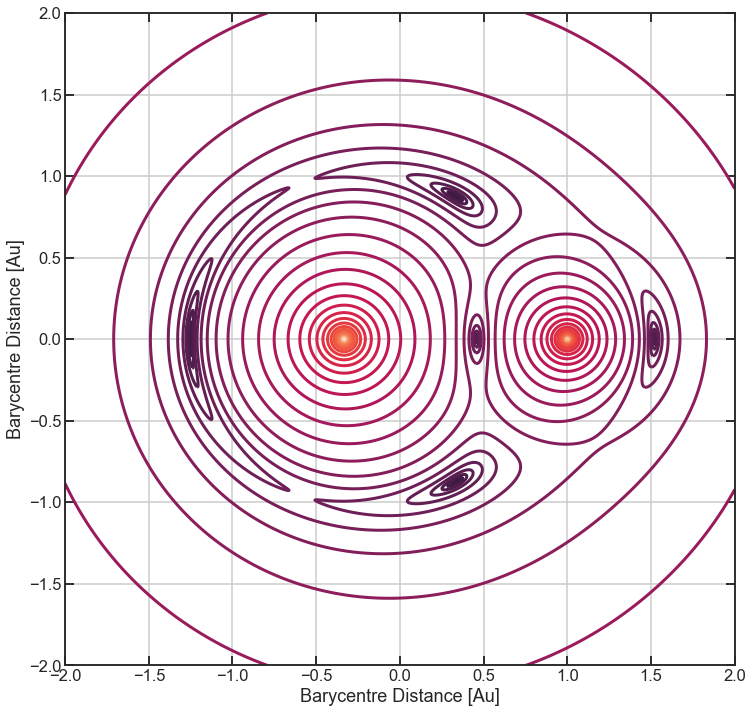

In [66]:
fig, ax = plt.subplots(figsize=(12,12))
plt.contour(xgrid/au, ygrid/au, np.log(a_tot.value),levels=40)

ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)

#ax.set_ylim(bottom=0)
ax.grid(which='both')
ax.set_ylabel(r'Barycentre Distance [Au]')
ax.set_xlabel(r'Barycentre Distance [Au]')

Text(0, 0.5, 'Acceleration [$ms^{-2}$]')

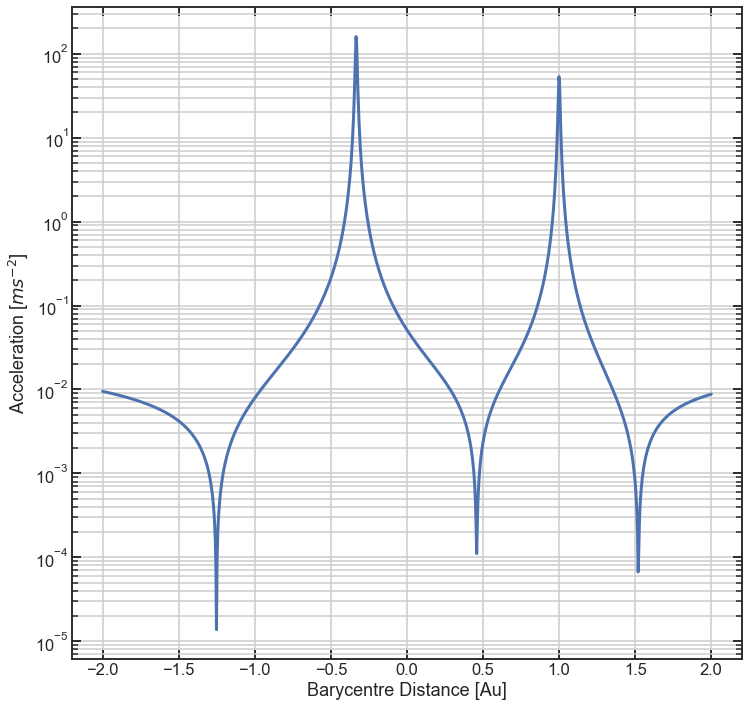

In [67]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(x/au,a_tot[int(N/2)+1,:].value)
#ax.set_xlim([0.9,1.1])
#ax.set_ylim(top=1e-5)
ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)

#ax.set_ylim(bottom=0)
ax.grid(which='both')
ax.set_yscale('log')
ax.set_xlabel(r'Barycentre Distance [Au]')
ax.set_ylabel(r'Acceleration [$ms^{-2}$]')